<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/bob_eda_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

# New Section

In [14]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

In [15]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-27"

In [215]:
# Download data from Yahoo Finance
symbol<-getSymbols("BANKBARODA.NS",from=start_date,auto.assign=FALSE)



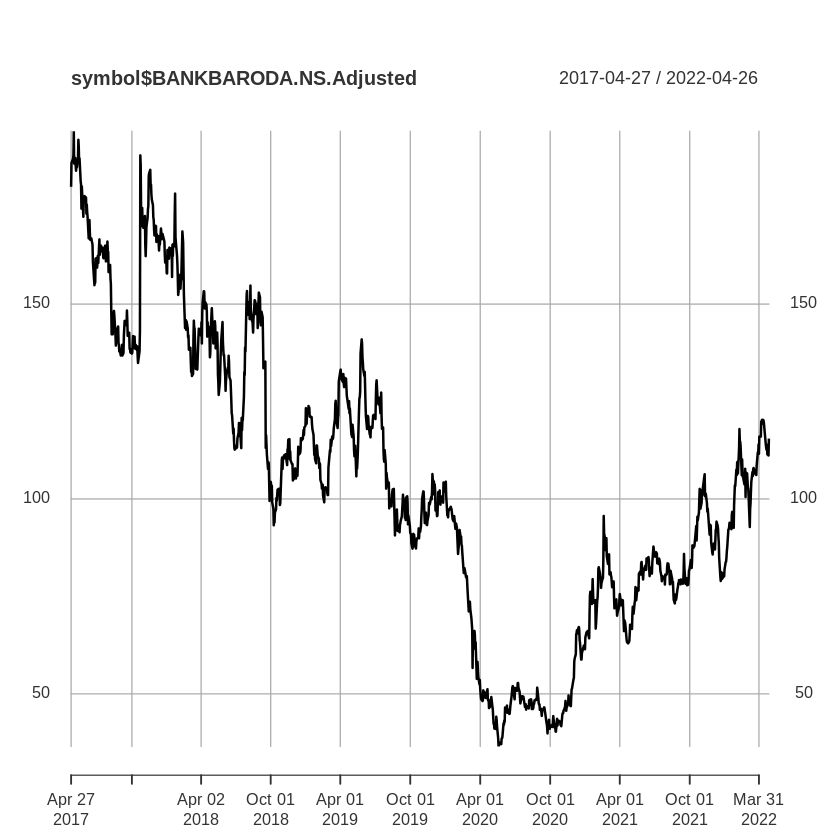

In [216]:
plot(symbol$BANKBARODA.NS.Adjusted)

In [217]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$BANKBARODA.NS.Volume>0,]

     Index            BANKBARODA.NS.Open BANKBARODA.NS.High BANKBARODA.NS.Low
 Min.   :2017-04-27   Min.   : 36.15     Min.   : 37.20     Min.   : 36.0    
 1st Qu.:2018-07-21   1st Qu.: 79.40     1st Qu.: 80.75     1st Qu.: 78.0    
 Median :2019-10-31   Median :102.20     Median :103.75     Median :100.1    
 Mean   :2019-10-26   Mean   :104.91     Mean   :106.86     Mean   :102.8    
 3rd Qu.:2021-01-23   3rd Qu.:133.60     3rd Qu.:136.85     3rd Qu.:130.8    
 Max.   :2022-04-26   Max.   :197.00     Max.   :206.65     Max.   :192.2    
 BANKBARODA.NS.Close BANKBARODA.NS.Volume BANKBARODA.NS.Adjusted
 Min.   : 36.50      Min.   :  1510641    Min.   : 36.50        
 1st Qu.: 79.45      1st Qu.: 13836107    1st Qu.: 79.45        
 Median :101.90      Median : 22911875    Median :101.90        
 Mean   :104.66      Mean   : 29459476    Mean   :104.61        
 3rd Qu.:133.30      3rd Qu.: 36705476    3rd Qu.:133.30        
 Max.   :195.75      Max.   :256891275    Max.   :194.34        

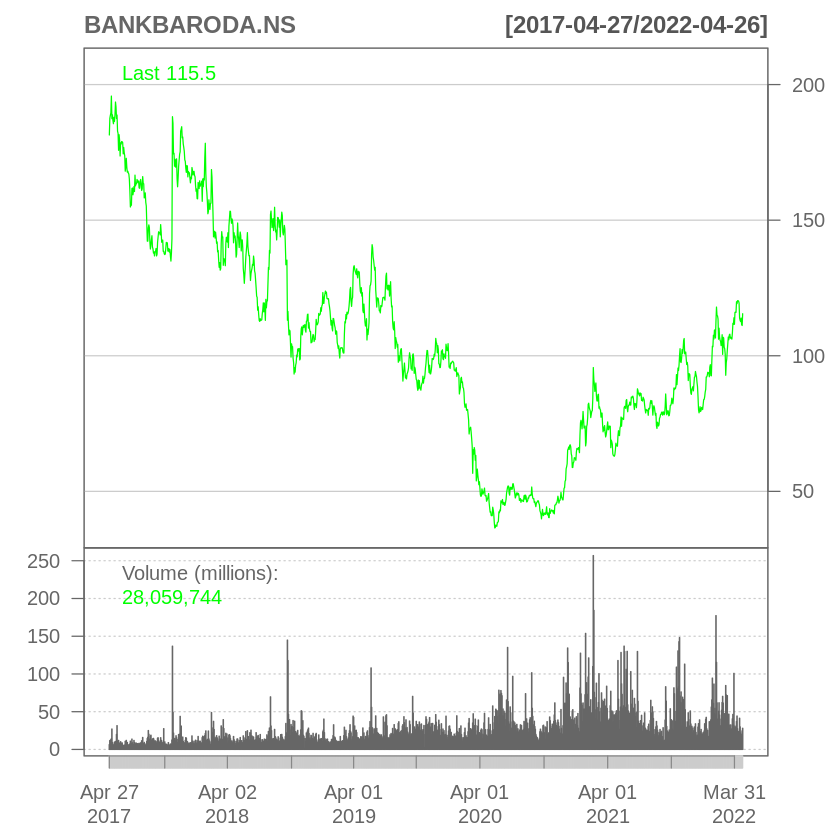

In [218]:
chartSeries(symbol,theme="white.mono",name="BANKBARODA.NS",type = 'line', up.col = "green",dn.col="red")

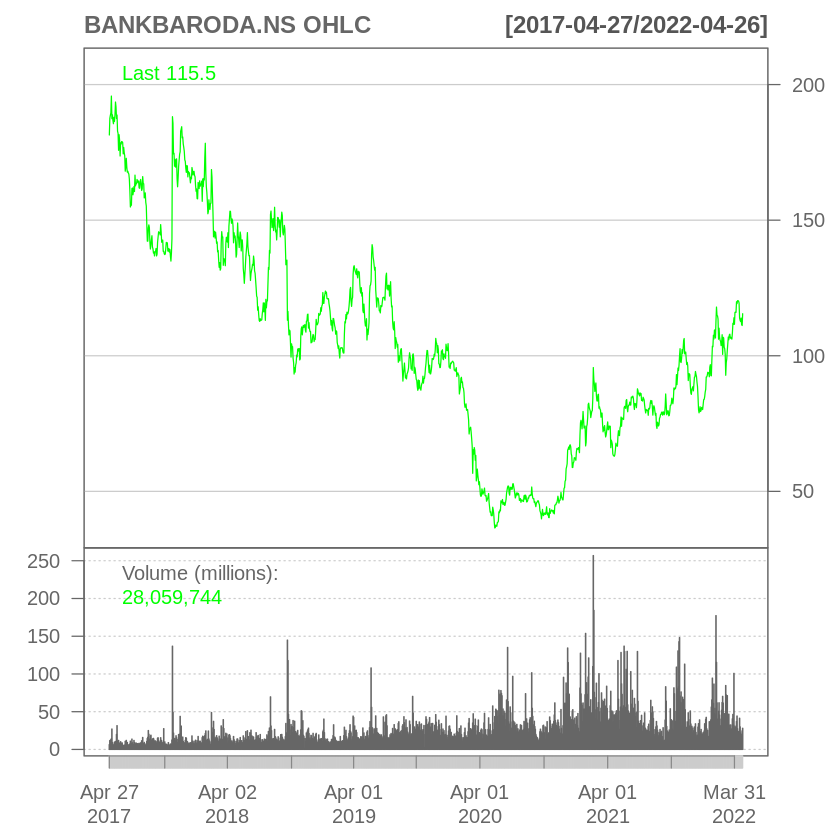

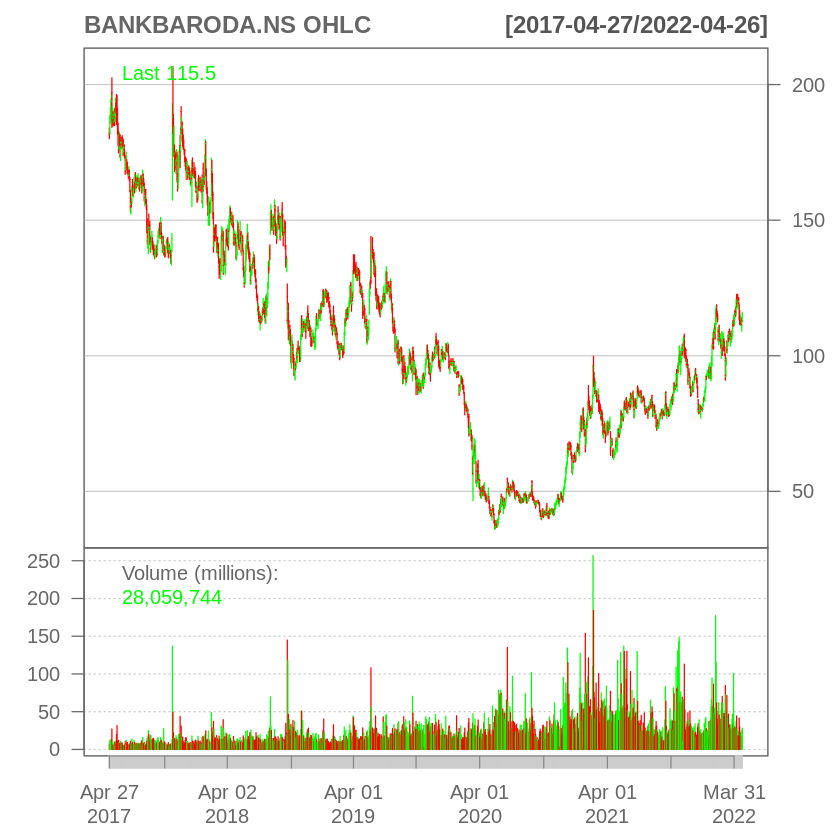

In [219]:
# Convert the Yahoo data into an OHLC Chart
symbol_ohlc<-as.quantmod.OHLC(symbol[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(symbol_ohlc, theme="white.mono", type ='line', name="BANKBARODA.NS OHLC", up.col = "green",dn.col="red")
chartSeries(symbol_ohlc, theme="white.mono", type ='bar',  name="BANKBARODA.NS OHLC", up.col = "green",dn.col="red")
# chartSeries(symbol_ohlc, theme="white.mono", type ='hlc',  name="BANKBARODA.NS OHLC", up.col = "green",dn.col="red")

In [220]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$BANKBARODA.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"BANKBARODA_returns.csv",row.names=FALSE)

           BANKBARODA.NS.Adjusted
2017-04-28            0.033341004
2017-05-02            0.005847918
2017-05-03            0.004759433
2017-05-04            0.032185529
2017-05-05           -0.043593008
2017-05-08            0.007707729

In [221]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$BANKBARODA.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 34.6016
  P VALUE:
    Asymptotic p Value: 3.064e-08 

Description:
 Wed Apr 27 04:24:40 2022 by user: 


In [222]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for BANKBARODA.NS
jarqueberaTest(returns$BANKBARODA.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 4735.0632
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 04:24:44 2022 by user: 


In [223]:
# Now we do other tests for same data for cross check
shapiroTest(prices$BANKBARODA.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9752
  P VALUE:
    9.924e-14 

Description:
 Wed Apr 27 04:24:47 2022 by user: 


In [224]:
shapiroTest(returns$BANKBARODA.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.931
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 04:24:51 2022 by user: 


In [225]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$BANKBARODA.NS.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$BANKBARODA.NS.Adjusted
Dickey-Fuller = -1.5817, Lag order = 10, p-value = 0.7554
alternative hypothesis: stationary


In [226]:
adf.test(returns$BANKBARODA.NS.Adjusted) 

Warning message in adf.test(returns$BANKBARODA.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$BANKBARODA.NS.Adjusted
Dickey-Fuller = -9.6917, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [227]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$BANKBARODA.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.004  -1.454   0.093   1.506  45.142 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
z.lag.1    -0.0010944  0.0008006  -1.367    0.172
z.diff.lag  0.0028384  0.0284595   0.100    0.921

Residual standard error: 3.125 on 1231 degrees of freedom
Multiple R-squared:  0.001526,	Adjusted R-squared:  -9.623e-05 
F-statistic: 0.9407 on 2 and 1231 DF,  p-value: 0.3906


Value of test-statistic is: -1.367 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [228]:
summary(ur.df(returns$BANKBARODA.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.178570 -0.015492 -0.000175  0.014499  0.274521 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.04463    0.04056 -25.756   <2e-16 ***
z.diff.lag  0.03206    0.02850   1.125    0.261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02908 on 1230 degrees of freedom
Multiple R-squared:  0.5063,	Adjusted R-squared:  0.5055 
F-statistic: 630.6 on 2 and 1230 DF,  p-value: < 2.2e-16


Value of test-statistic is: -25.7555 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [229]:
summary(ur.kpss(prices$BANKBARODA.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 10.4711 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [230]:
summary(ur.kpss(returns$BANKBARODA.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.2564 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


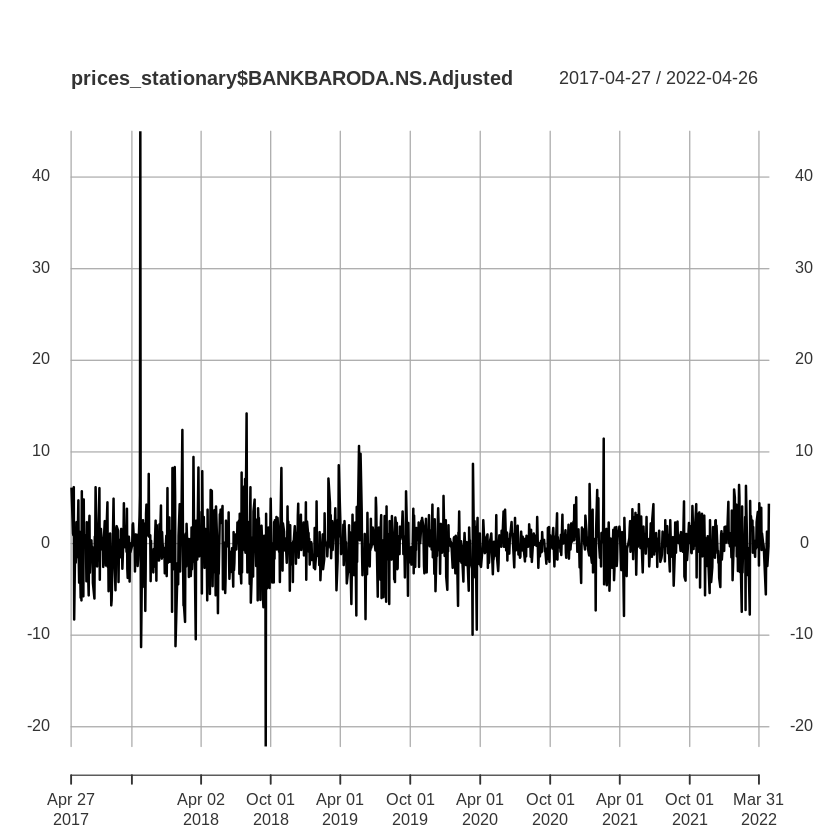

In [231]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices_stationary <- diff(prices)
plot (prices_stationary$BANKBARODA.NS.Adjusted)

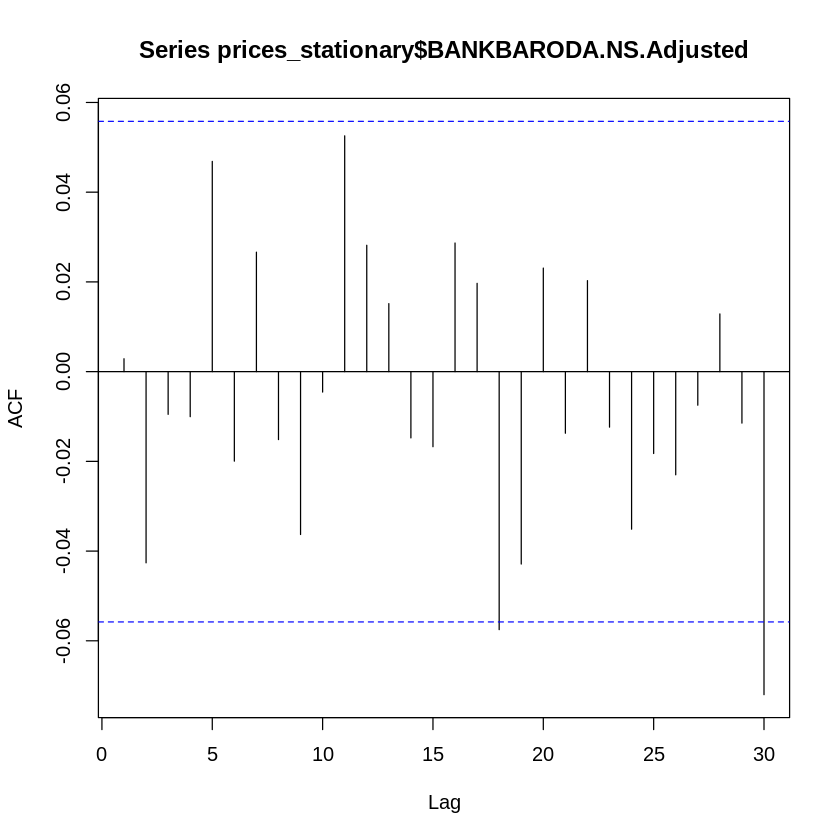

In [232]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices_stationary<-na.omit(prices_stationary)
acf(prices_stationary$BANKBARODA.NS.Adjusted)

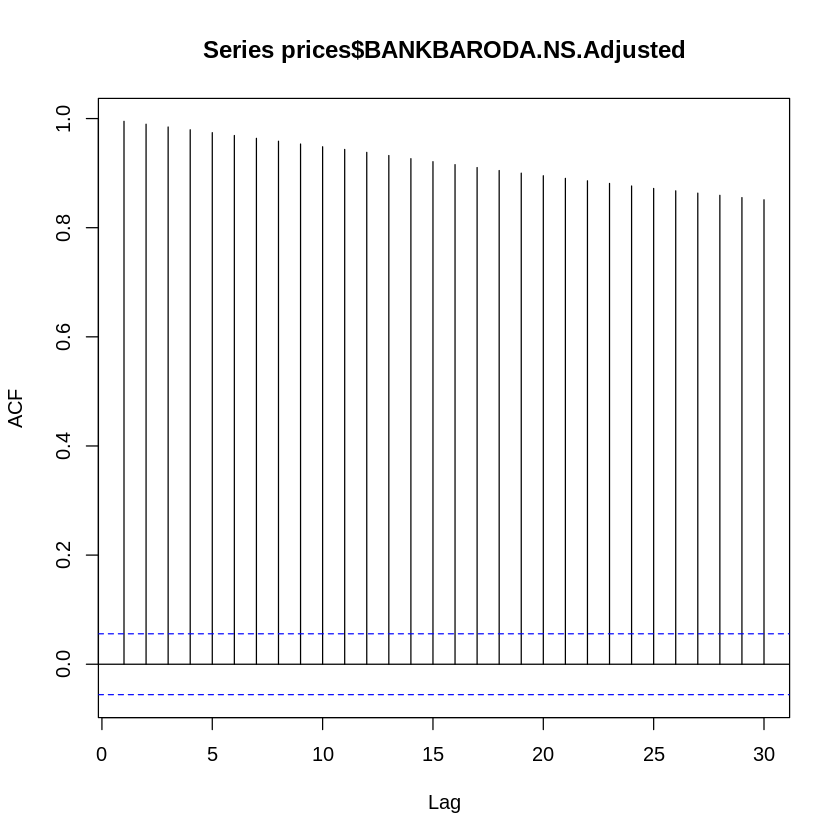

In [233]:
# on the otherhand if we compute ACF on data with trend
prices<-na.omit(prices)
acf(prices$BANKBARODA.NS.Adjusted)

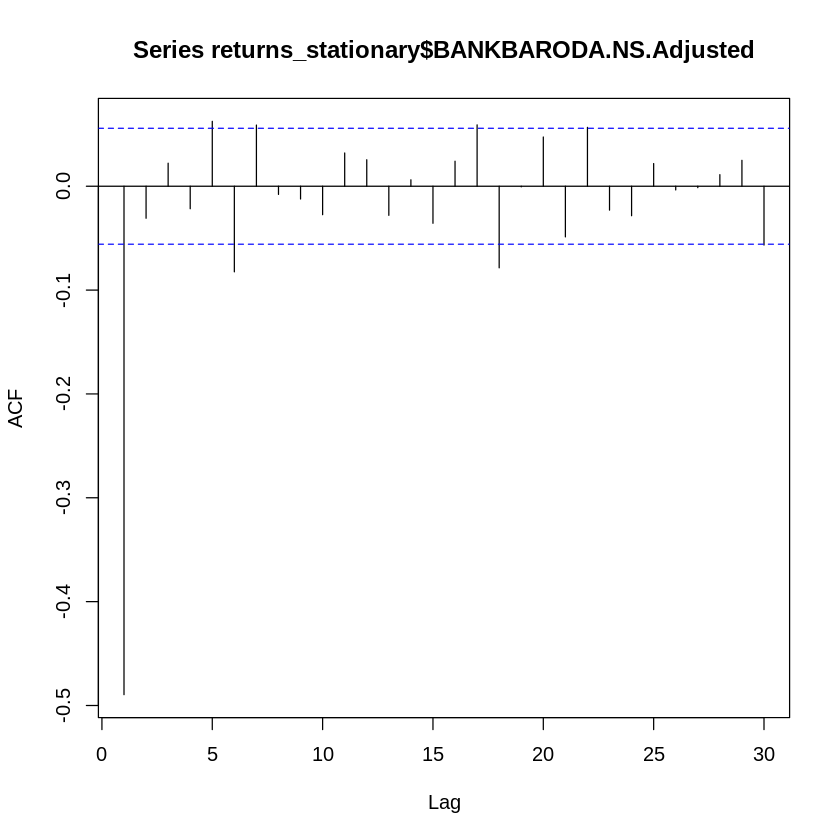

In [234]:
# similarly, finding acf for returns.
returns_stationary <- diff(returns)
returns_stationary<-na.omit(returns_stationary)
acf(returns_stationary$BANKBARODA.NS.Adjusted)

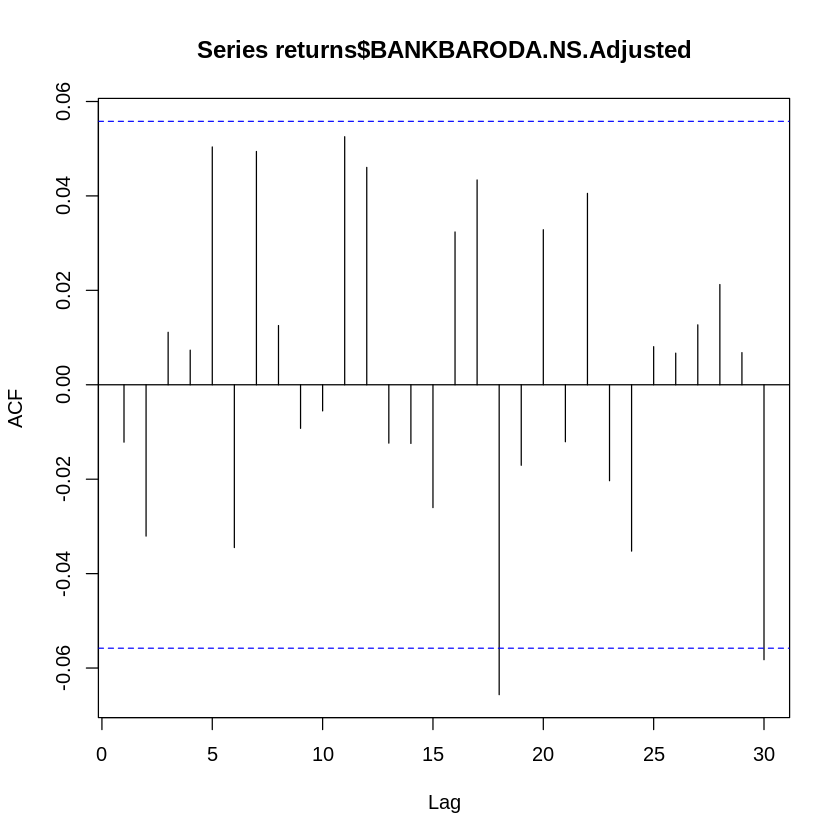

In [235]:
# on the otherhand if we compute ACF on data with trend
returns<-na.omit(returns)
acf(returns$BANKBARODA.NS.Adjusted)

In [236]:
# tests for auto-corelation
Box.test(prices_stationary$BANKBARODA.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices_stationary$BANKBARODA.NS.Adjusted
X-squared = 5.2216, df = 5, p-value = 0.3894


In [237]:
# for returns
Box.test(returns_stationary$BANKBARODA.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns_stationary$BANKBARODA.NS.Adjusted
X-squared = 303.48, df = 5, p-value < 2.2e-16


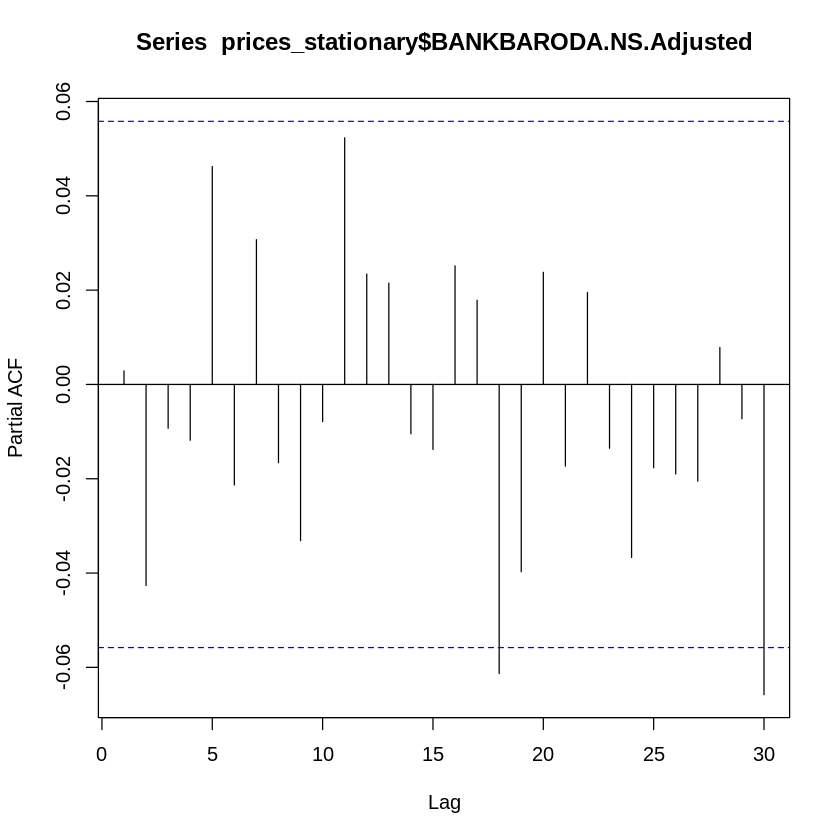

In [238]:
#PACF
pacf(prices_stationary$BANKBARODA.NS.Adjusted)

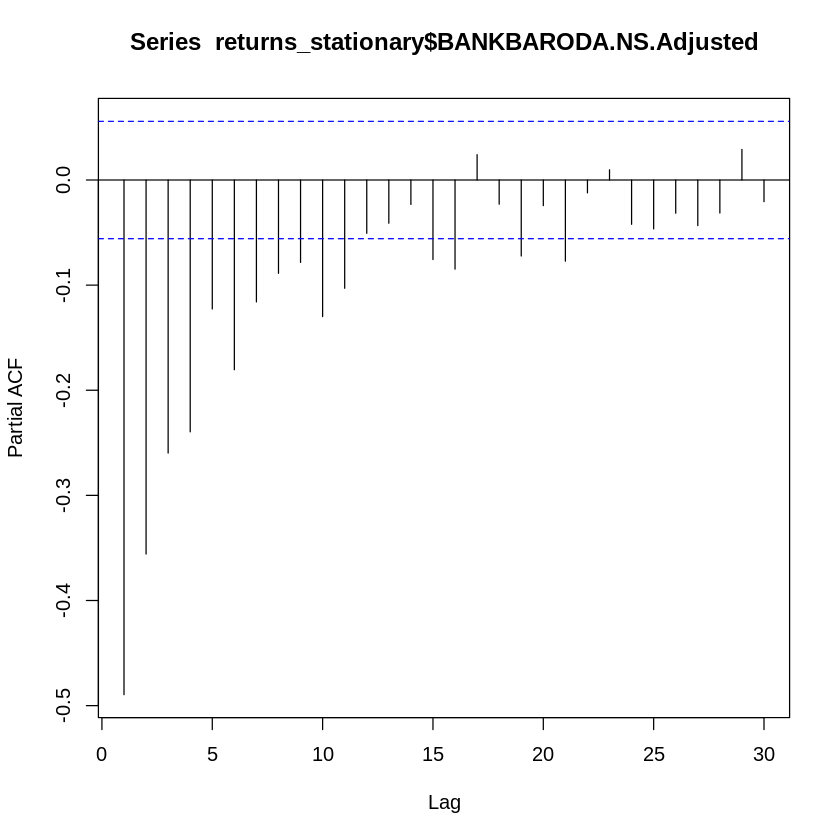

In [239]:
pacf(returns_stationary$BANKBARODA.NS.Adjusted)

In [240]:
basicStats(prices)

,BANKBARODA.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,36.500000
Maximum,194.343414
1. Quartile,79.449997
3. Quartile,133.300003
Mean,104.614254
Median,101.900002
Sum,129198.603374


In [241]:
BoxCox.lambda(prices$BANKBARODA.NS.Adjusted)

[1] 0.3720516

In [244]:
# To make our data appear normal
prices_normal<-prices
prices_normal$BANKBARODA.NS.Adjusted<-forecast::BoxCox(prices$BANKBARODA.NS.Adjusted, lambda = 0.372051642466059)
basicStats(prices_normal)

,BANKBARODA.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,7.560467
Maximum,16.404707
1. Quartile,10.999880
3. Quartile,13.905904
Mean,12.225202
Median,12.327752
Sum,15098.124956


In [243]:
returns_normal<-returns
# to handle negative values in the returns
returns_normal<-exp(returns_normal)
returns_normal<-na.omit(returns_normal)
BoxCox.lambda(returns_normal$BANKBARODA.NS.Adjusted)


[1] -0.9999242

In [245]:
returns_normal$BANKBARODA.NS.Adjusted<-forecast::BoxCox(returns$BANKBARODA.NS.Adjusted, lambda = -0.99992424816297)
# need to take log, basically to undo the exp above
# returns_normal<-log(returns_normal) 
basicStats(returns_normal)

,BANKBARODA.NS.Adjusted
,<dbl>
nobs,1.234000e+03
NAs,6.270000e+02
Minimum,-3.121645e+03
Maximum,-2.658202e+00
1. Quartile,-1.595748e+02
3. Quartile,-3.526947e+01
Mean,-2.015945e+02
Median,-6.384011e+01
Sum,-1.223679e+05


In [246]:
model<-auto.arima(prices$BANKBARODA.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(0,1,0)  


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 6321.404
 ARIMA(0,1,0) with drift         : 6317.949
 ARIMA(1,1,0) with drift         : 6317.063
 ARIMA(0,1,1) with drift         : 6319.947
 ARIMA(0,1,0)                    : 6316.288
 ARIMA(1,1,1) with drift         : 6318.5

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0)                    : 6318.569

 Best model: ARIMA(0,1,0)                    



     Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
1236          115.5 111.4911 119.5089 109.36889 121.6311
1237          115.5 109.8305 121.1695 106.82931 124.1707
1238          115.5 108.5564 122.4436 104.88061 126.1194
1239          115.5 107.4822 123.5178 103.23779 127.7622
1240          115.5 106.5358 124.4642 101.79043 129.2096
1241          115.5 105.6802 125.3198 100.48192 130.5181
1242          115.5 104.8934 126.1066  99.27862 131.7214
1243          115.5 104.1611 126.8389  98.15861 132.8414
1244          115.5 103.4733 127.5267  97.10668 133.8933
1245          115.5 102.8227 128.1773  96.11174 134.8883

In [247]:
cor(prices)

,BANKBARODA.NS.Adjusted
BANKBARODA.NS.Adjusted,1


In [248]:
cor(returns)

,BANKBARODA.NS.Adjusted
BANKBARODA.NS.Adjusted,1



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 8.526, df = 10, p-value = 0.5776

Model df: 0.   Total lags used: 10



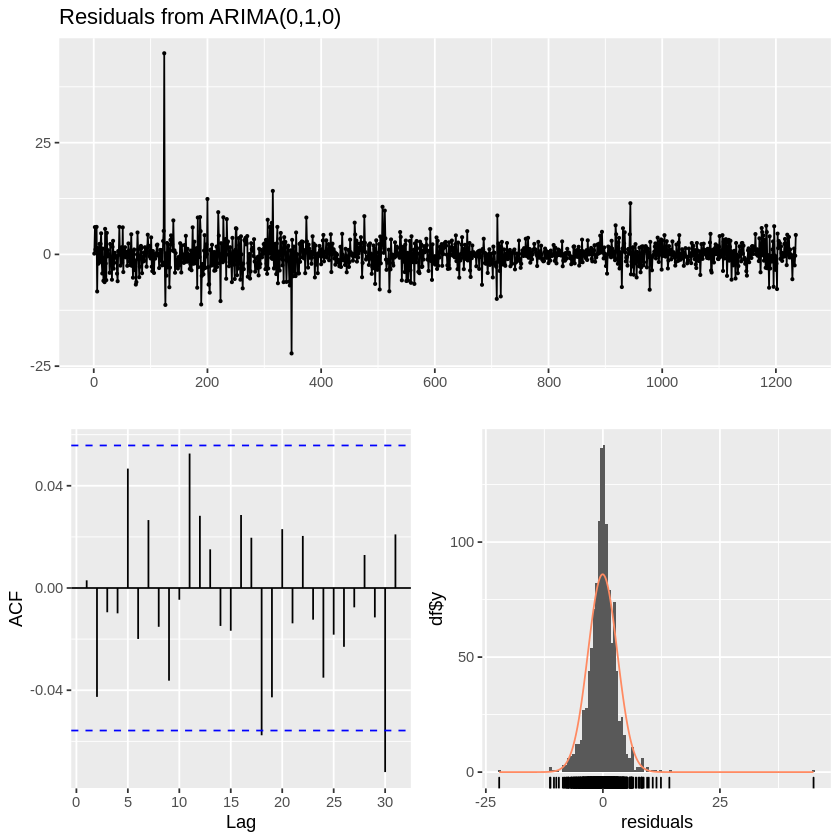

In [249]:
# Model analysis - The residuals will tell us if the model was able to capture 
# all of the information provided by the data.
checkresiduals(model)

In [250]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.05215904,3.126906,2.056373,-0.07798284,2.037792,0.9992611,0.002991408


In [251]:
# Forecast for next day
fcast <- forecast(model, 30)
print(summary(fcast))
tail(prices)


Forecast method: ARIMA(0,1,0)

Model Information:
Series: prices$BANKBARODA.NS.Adjusted 
ARIMA(0,1,0) 

sigma^2 = 9.785:  log likelihood = -3158.28
AIC=6318.57   AICc=6318.57   BIC=6323.68

Error measures:
                      ME     RMSE      MAE         MPE     MAPE      MASE
Training set -0.05215904 3.126906 2.056373 -0.07798284 2.037792 0.9992611
                    ACF1
Training set 0.002991408

Forecasts:
     Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
1236          115.5 111.49108 119.5089 109.36889 121.6311
1237          115.5 109.83054 121.1695 106.82931 124.1707
1238          115.5 108.55636 122.4436 104.88061 126.1194
1239          115.5 107.48217 123.5178 103.23779 127.7622
1240          115.5 106.53579 124.4642 101.79043 129.2096
1241          115.5 105.68020 125.3198 100.48192 130.5181
1242          115.5 104.89341 126.1066  99.27862 131.7214
1243          115.5 104.16108 126.8389  98.15861 132.8414
1244          115.5 103.47325 127.5267  97.10668 133.8933
124

           BANKBARODA.NS.Adjusted
2022-04-19                 113.05
2022-04-20                 112.60
2022-04-21                 113.90
2022-04-22                 111.45
2022-04-25                 111.15
2022-04-26                 115.50

[1] 1235

[1] 2.325223

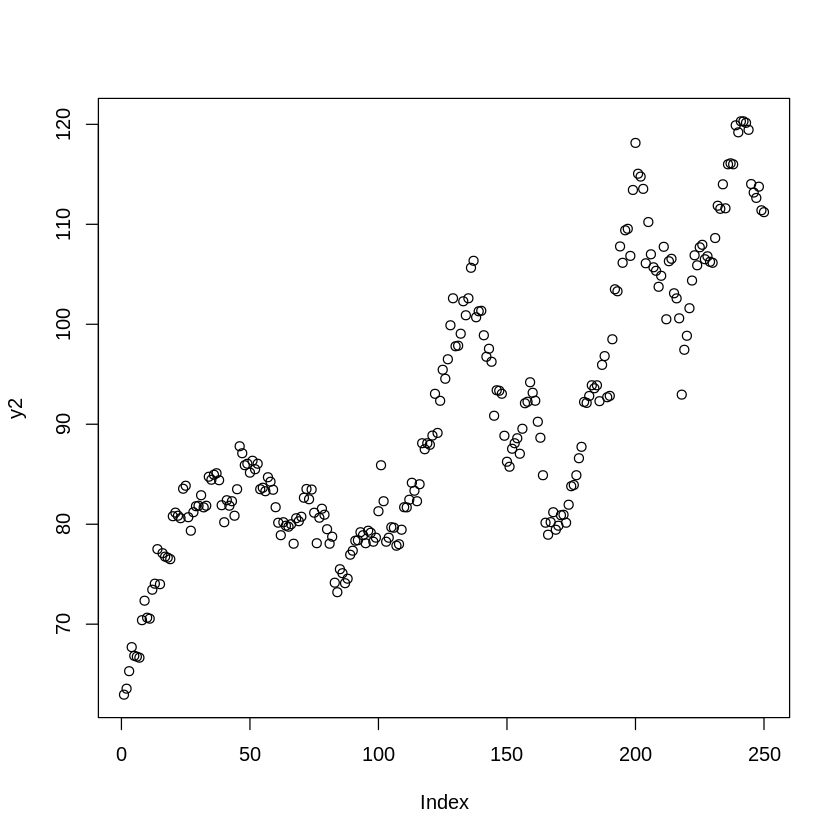

In [252]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 1235 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$BANKBARODA.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$BANKBARODA.NS.Adjusted,250)) 


[1] 1234

[1] 0.02511477

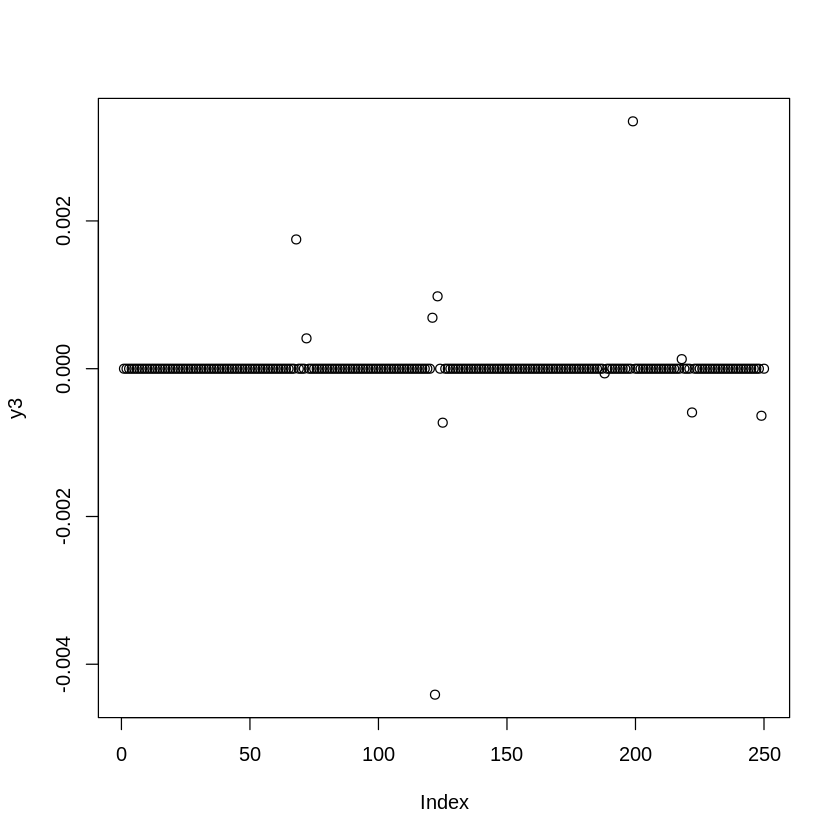

In [253]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$BANKBARODA.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$BANKBARODA.NS.Adjusted,250)) 